# Flight Fare Prediction
# Tech. - Machine Learning 
# Domain - Aviation

Problem statement:

Traveling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights, destination, and duration of flights various occasions such as vacations or festive seasons. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time.

The main goal is to predict the fares of the flights based on different factors available in the provided dataset.



Approach:


The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building, and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

In [2]:
# importing libs

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




In [3]:
def showdf():
    print(df_train.head(10))

In [4]:
sns.set()

Importing dataset (Training) using pandas (read_excel())

In [5]:
df_train = pd.read_excel(r"Data_Train.xlsx")


veiwing 1st 5 rows

In [6]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


checking df shape, info and null values

In [7]:
df_train.shape[0]

10683

In [8]:
df_train.shape[1]

11

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
#droping null values

In [12]:
df_train.dropna(inplace = True)

In [13]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
df_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [15]:
df_train["Date_of_Journey"] = pd.to_datetime(df_train.Date_of_Journey, format = "%d/%m/%Y")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
#adding columns months ,day and year

In [17]:
df_train["Journey_day"] = df_train["Date_of_Journey"].dt.day
df_train["Journey_month"] = df_train["Date_of_Journey"].dt.month
df_train["Journey_year"] = df_train["Date_of_Journey"].dt.year

In [18]:
df_train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019


In [19]:
#removing date of journey

In [20]:
df_train.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [21]:
showdf()

             Airline    Source Destination                  Route Dep_Time  \
0             IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1          Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2        Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3             IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4             IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   
5           SpiceJet   Kolkata    Banglore              CCU → BLR    09:00   
6        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    18:55   
7        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    08:00   
8        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    08:55   
9  Multiple carriers     Delhi      Cochin        DEL → BOM → COK    11:25   

   Arrival_Time Duration Total_Stops              Additional_Info  Price  \
0  01:10 22 Mar   2h 50m    non-stop                      No info

In [22]:
#arrival time into datetime format

In [23]:
df_train["Arrival_Time"] = pd.to_datetime(df_train.Arrival_Time)

In [24]:
showdf()

             Airline    Source Destination                  Route Dep_Time  \
0             IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1          Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2        Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3             IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4             IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   
5           SpiceJet   Kolkata    Banglore              CCU → BLR    09:00   
6        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    18:55   
7        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    08:00   
8        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    08:55   
9  Multiple carriers     Delhi      Cochin        DEL → BOM → COK    11:25   

         Arrival_Time Duration Total_Stops              Additional_Info  \
0 2022-03-22 01:10:00   2h 50m    non-stop                      No

In [25]:
#adding columns Arrival_hour& Arrival_min

In [26]:
df_train["Arrival_hour"] = df_train["Arrival_Time"].dt.hour
df_train["Arrival_min"] = df_train["Arrival_Time"].dt.minute
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2022-07-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2022-07-18 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2022-07-18 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [27]:
#removing arrival time
df_train.drop(['Arrival_Time'], axis = 1, inplace = True)
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [28]:
#same process for dep time

In [29]:
df_train["Dep_Time"] = pd.to_datetime(df_train.Dep_Time)
df_train["Dep_hour"] = df_train["Dep_Time"].dt.hour
df_train["Dep_min"] = df_train["Dep_Time"].dt.minute
df_train.drop(["Dep_Time"], axis = 1, inplace = True)
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [30]:
#hrs → mins
duration =  list(df_train['Duration'])
minutes = []

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            minutes.append( int(duration[i].split(sep = 'h')[0]) * 60) 
        else: 
            minutes.append(int(duration[i].split(sep = 'm')[0]))
    else:       
        minutes.append(int(duration[i].split(sep = 'h')[0]) * 60 + int(duration[i].split(sep =  'm')[0].split()[-1]))
        
df_train["Duration_min"] =  minutes
df_train.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,285


In [31]:
#removing duration

In [32]:
df_train.drop("Duration", axis = 1, inplace = True)
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,21,35,16,50,285


In [33]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

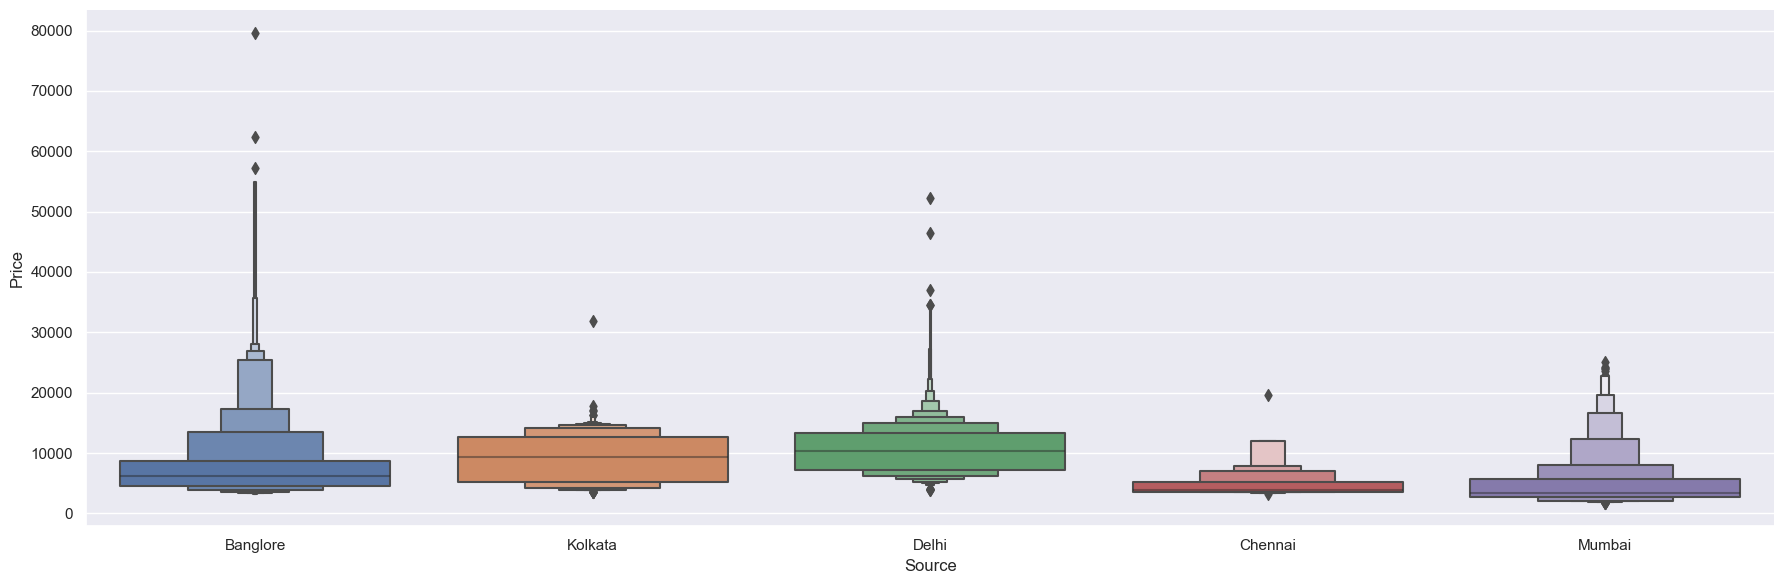

In [54]:
sns.catplot(x = "Source", y = "Price", data = df_train, kind = 'boxen', aspect = 3, height = 6)

In [51]:
#OHE for source
source = df_train['Source']
source = pd.get_dummies(source , drop_first = True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [52]:
#destination
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

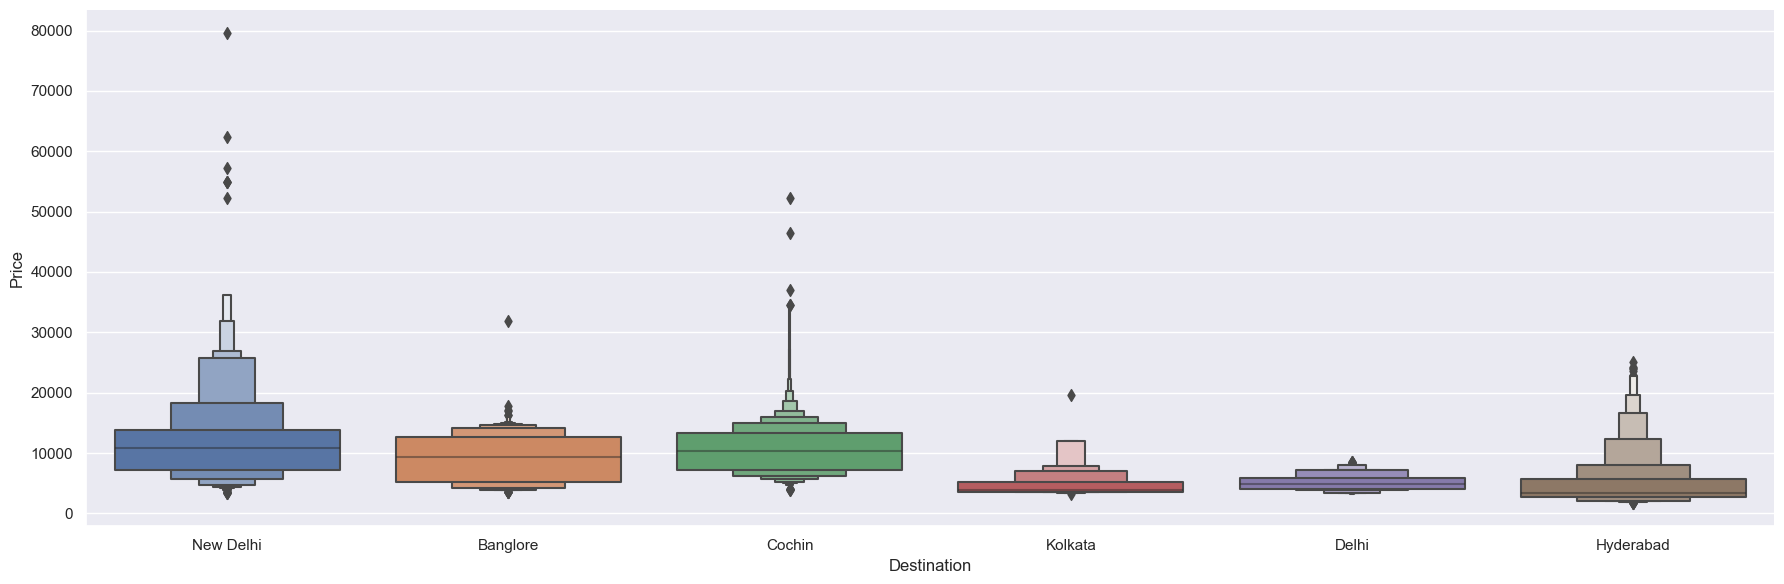

In [53]:
sns.catplot(x = "Destination", y = "Price", data = df_train, kind = 'boxen', aspect = 3, height = 6)

In [55]:
destination = df_train['Destination']
destination = pd.get_dummies(destination , drop_first = True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [56]:
#same for airline column

In [57]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

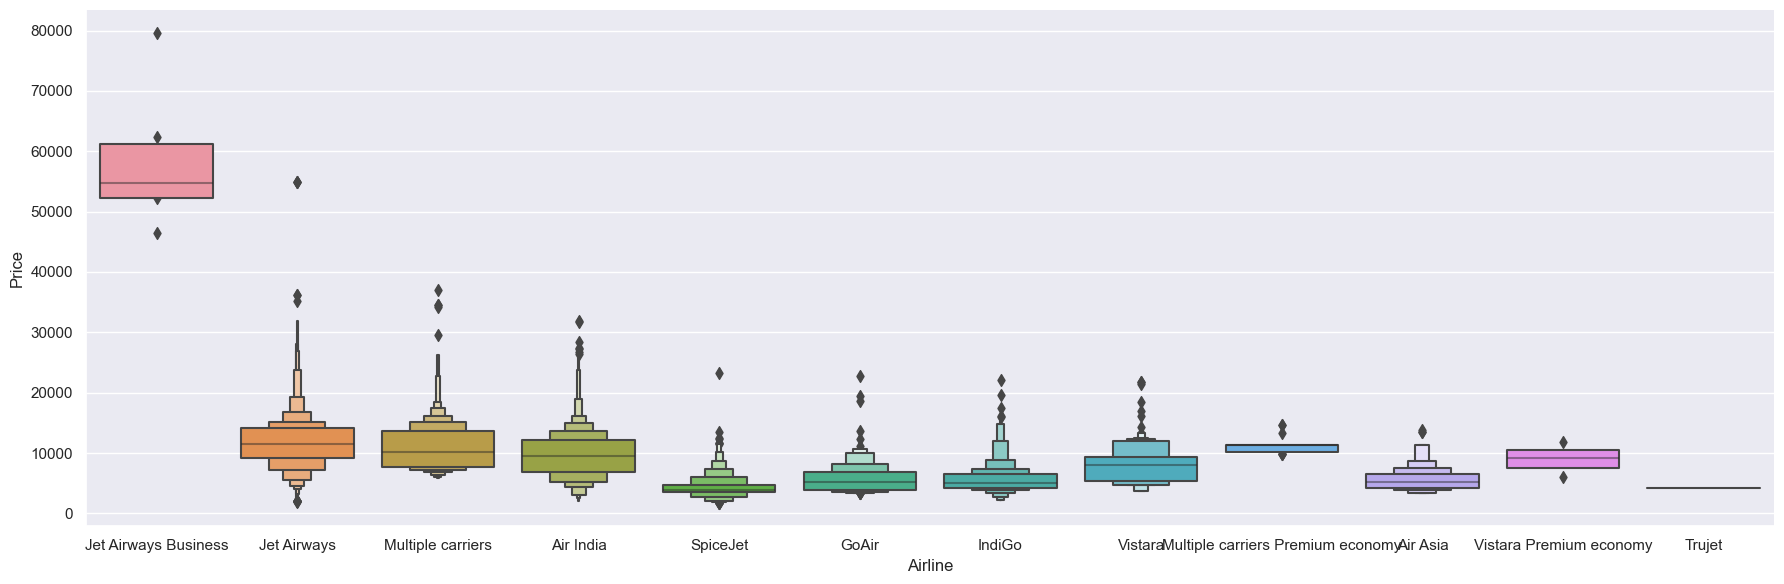

In [58]:
sns.catplot(x = "Airline", y = "Price", data = df_train.sort_values("Price", ascending = False), kind = 'boxen', aspect = 3, height = 6)

In [59]:
airlines = df_train['Airline']
airlines = pd.get_dummies(airlines , drop_first = True)
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [60]:
#corelation betn route and total_stops
df_train[["Route", "Total_Stops"]].head(10)

,Route,Total_Stops
0,BLR → DEL,non-stop
1,CCU → IXR → BBI → BLR,2 stops
2,DEL → LKO → BOM → COK,2 stops
3,CCU → NAG → BLR,1 stop
4,BLR → NAG → DEL,1 stop
5,CCU → BLR,non-stop
6,BLR → BOM → DEL,1 stop
7,BLR → BOM → DEL,1 stop
8,BLR → BOM → DEL,1 stop
9,DEL → BOM → COK,1 stop


In [61]:
#since routes and total_stops are realted , routes can be eliminated
df_train.drop('Route', axis = 1, inplace = True)
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50,285


In [63]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [65]:
#converting to int
stops =  {'Total_Stops' : {'non-stop' : 0, '1 stop' : 1, '2 stops' :  2, '3 stops':  3, '4 stops' : 4}}
df_train.replace(stops, inplace = True)
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,285


In [66]:
#since most of the Additional_Info values are the same , it can be dropped

In [67]:
df_train.drop('Additional_Info', axis = 1, inplace = True)

In [70]:
processed_df = pd.concat([df_train, source, destination, airlines], axis = 1)
processed_df.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace =True)
processed_df.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,2019,1,10,22,20,170,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,2019,13,15,5,50,445,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,2019,4,25,9,25,1140,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,2019,23,30,18,5,325,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,2019,21,35,16,50,285,...,0,1,0,0,0,0,0,0,0,0


In [71]:
processed_df.shape
processed_df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_min',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

TEST df

In [73]:
df_test = pd.read_excel(r"Test_set.xlsx")

In [74]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [75]:
df_test.shape[0]
df_test.shape[1]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [77]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [78]:
#date format to datetime

In [79]:
df_test["Date_of_Journey"] = pd.to_datetime(df_test.Date_of_Journey, format = "%d/%m/%Y")
df_test["Journey_day"] = df_test["Date_of_Journey"].dt.day
df_test["Journey_month"] = df_test["Date_of_Journey"].dt.month
df_test.drop(['Date_of_Journey'], axis = 1, inplace = True)
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [80]:
#time formats

In [81]:
df_test["Arrival_Time"] = pd.to_datetime(df_test.Arrival_Time)
df_test["Arrival_hour"] = df_test["Arrival_Time"].dt.hour
df_test["Arrival_min"] = df_test["Arrival_Time"].dt.minute
df_test.drop(['Arrival_Time'], axis = 1, inplace = True)
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,24,6,2,45


In [82]:
#dep time

In [84]:
df_test["Dep_Time"] = pd.to_datetime(df_test.Dep_Time)
df_test["Dep_hour"] = df_test["Dep_Time"].dt.hour
df_test["Dep_min"] = df_test["Dep_Time"].dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55


In [85]:
#duration

In [86]:
duration =  list(df_test['Duration'])
minutes = []

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            minutes.append( int(duration[i].split(sep = 'h')[0]) * 60) 
        else: 
            minutes.append(int(duration[i].split(sep = 'm')[0]))
    else:       
        minutes.append(int(duration[i].split(sep = 'h')[0]) * 60 + int(duration[i].split(sep =  'm')[0].split()[-1]))

df_test["Duration_min"] =  minutes
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55,170


In [88]:
df_test.drop("Duration", axis = 1, inplace = True)

In [89]:
##OHE for source

In [91]:
df_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [92]:
source = df_test['Source']
source = pd.get_dummies(source , drop_first = True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [93]:
df_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [95]:
destination = df_test['Destination']
destination = pd.get_dummies(destination , drop_first = True)
destination.head()
#ohe for destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [96]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [97]:
airlines = df_test['Airline']
airlines = pd.get_dummies(airlines , drop_first = True)
airlines["Trujet"] = 0
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Trujet
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [98]:
df_test.drop('Route', axis = 1, inplace = True)
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,2,45,23,55,170


In [99]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [100]:
#converting stops to int

In [102]:
stops =  {'Total_Stops' : {'non-stop' : 0, '1 stop' : 1, '2 stops' :  2, '3 stops':  3, '4 stops' : 4}}
df_test.replace(stops, inplace = True)
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,0,No info,24,6,2,45,23,55,170


In [103]:
df_test['Additional_Info'].value_counts(normalize = True)

No info                         0.804193
In-flight meal not included     0.166230
No check-in baggage included    0.028454
1 Long layover                  0.000374
Business class                  0.000374
Change airports                 0.000374
Name: Additional_Info, dtype: float64

In [105]:
df_test.drop('Additional_Info', axis = 1, inplace = True)

In [106]:
protest_df = pd.concat([df_test, source, destination, airlines], axis = 1)
protest_df.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Trujet
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,17,30,...,0,0,1,0,0,0,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,6,20,...,0,1,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,19,15,...,0,0,1,0,0,0,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,8,0,...,0,0,0,0,1,0,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,2,45,23,55,...,0,0,0,0,0,0,0,0,0,0


In [107]:
protest_df.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace =True)


In [108]:
protest_df.shape

(2671, 28)

In [109]:
#selecting features

In [119]:
X = processed_df.drop("Price", axis = 1).values
Y = processed_df["Price"].values

In [120]:
print("X =", X)
print()
print("Y =", Y)

X = [[ 0 24  3 ...  0  0  0]
 [ 2  1  5 ...  0  0  0]
 [ 2  9  6 ...  0  0  0]
 ...
 [ 0 27  4 ...  0  0  0]
 [ 0  1  3 ...  0  1  0]
 [ 2  9  5 ...  0  0  0]]

Y = [ 3897  7662 13882 ...  7229 12648 11753]


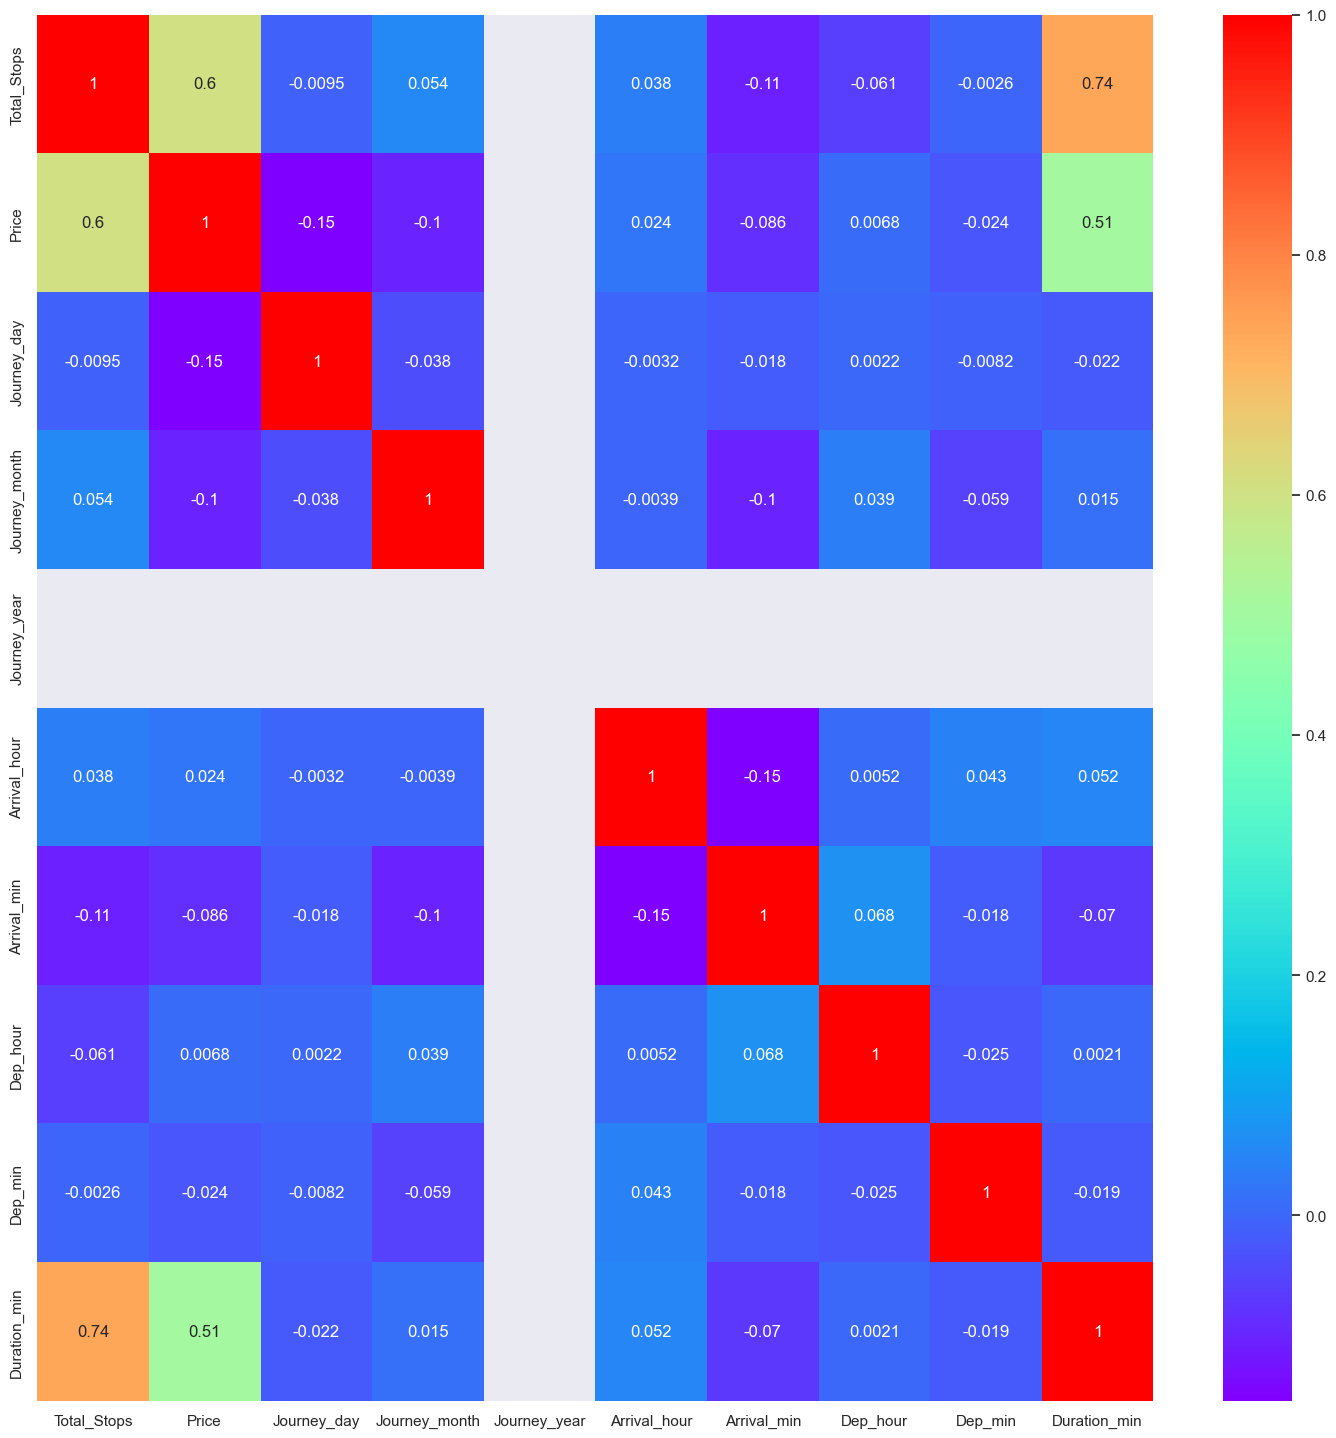

In [112]:
plt.figure(figsize = (18,18))
sns.heatmap(df_train.corr(), annot = True, cmap = "rainbow")
plt.show()

In [122]:
from sklearn.ensemble import ExtraTreesRegressor
mdl1 = ExtraTreesRegressor()
mdl1.fit(X,Y)


ExtraTreesRegressor()

<AxesSubplot:>

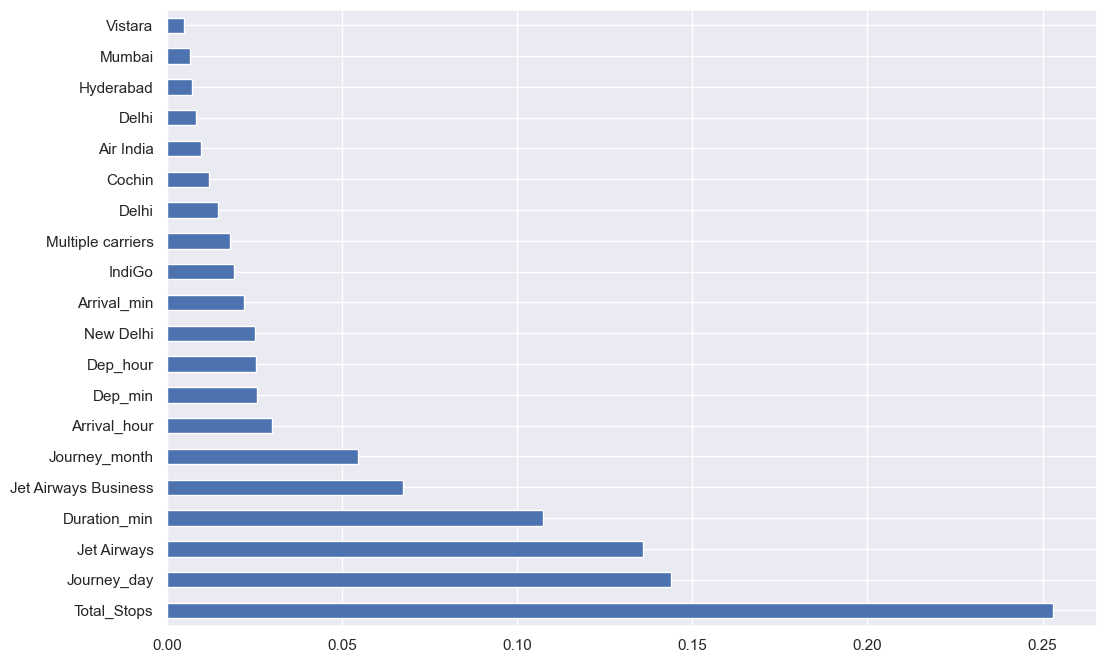

In [123]:
plt.figure(figsize = (12, 8))
columns = processed_df.drop("Price", axis = 1).columns
fseries = pd.Series(mdl1.feature_importances_, index = columns)
fseries.nlargest(20).plot(kind = "barh")

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 43)

print("Training Set \nX =", X_train.shape, "\nY =", Y_train.shape)
print()
print("Test Set \nX =", X_test.shape, "\nY =", Y_test.shape)

Training Set 
X = (7477, 29) 
Y = (7477,)

Test Set 
X = (3205, 29) 
Y = (3205,)


In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [166]:
lireg_mdl = LinearRegression()
lireg_mdl.fit(X_train, Y_train)
# Finding the coefficient and intercept for plotting the regression line
coeff = pd.Series(lireg_mdl.coef_, index = columns)
intp = lireg_mdl.intercept_

print("Intercept -->", intp)
print("\nCoefficients -->\n\n", coeff)

Intercept --> 7279.62673739873

Coefficients -->

 Total_Stops                          2.707169e+03
Journey_day                         -7.331010e+01
Journey_month                       -4.092011e+02
Journey_year                        -7.105427e-12
Arrival_hour                        -1.259529e+01
Arrival_min                          1.256586e+00
Dep_hour                             2.126542e+01
Dep_min                             -2.333374e+00
Duration_min                         1.722365e-02
Chennai                             -2.466149e+01
Delhi                                3.649515e+01
Kolkata                             -8.822713e+00
Mumbai                              -8.963780e+02
Cochin                               3.649515e+01
Delhi                               -9.286917e+02
Hyderabad                           -8.963780e+02
Kolkata                             -2.466149e+01
New Delhi                            1.822059e+03
Air India                            1.645313e+03

In [167]:
Y_hat = lireg_mdl.predict(X_test)
print("Predicted values for the Test Set\n", Y_hat[:100])

Predicted values for the Test Set
 [ 5990.71025576 13018.65685578 11028.09266049  3981.14517614
  5978.16701604  6308.01037928  6664.71604823  2891.32665292
  5586.8426196  11614.02807621 10181.54797158  5758.3779032
  4818.56632855 13113.56397449 11189.02595238  9084.86288788
  3746.39185573 10896.45870774  4303.55079984  6101.94581097
  8165.20891178 10067.2278794   6233.44096732  6840.33417206
  3950.48572814 10548.69624588  6631.62205035  9346.14584176
 11334.45347587 11612.52102955  8966.88573826 11892.73687918
 15058.82558258  4482.87615267  4925.52943301 11474.06761744
 11505.0240142  12960.93614411 11857.26613487  7205.84154788
 11065.54449567 11251.72336616  6637.95790381  7647.24040686
  7735.52446856  3392.50614077 14159.19738423  3693.15184904
 12275.3429589  11762.48227227 11492.04782352  3982.37296982
 11922.27742388 12586.75374886  4922.53747881  3104.14869275
  6514.56787261  3715.94827211 14742.51164581  5988.48802253
 11661.35434619 11839.99644255 12473.23971963 11395

In [168]:
lireg_mdl.score(X_train, Y_train)

0.6116527440961459

In [169]:
lireg_mdl.score(X_test, Y_test)

0.6490392122093431

Text(0, 0.5, 'Count')

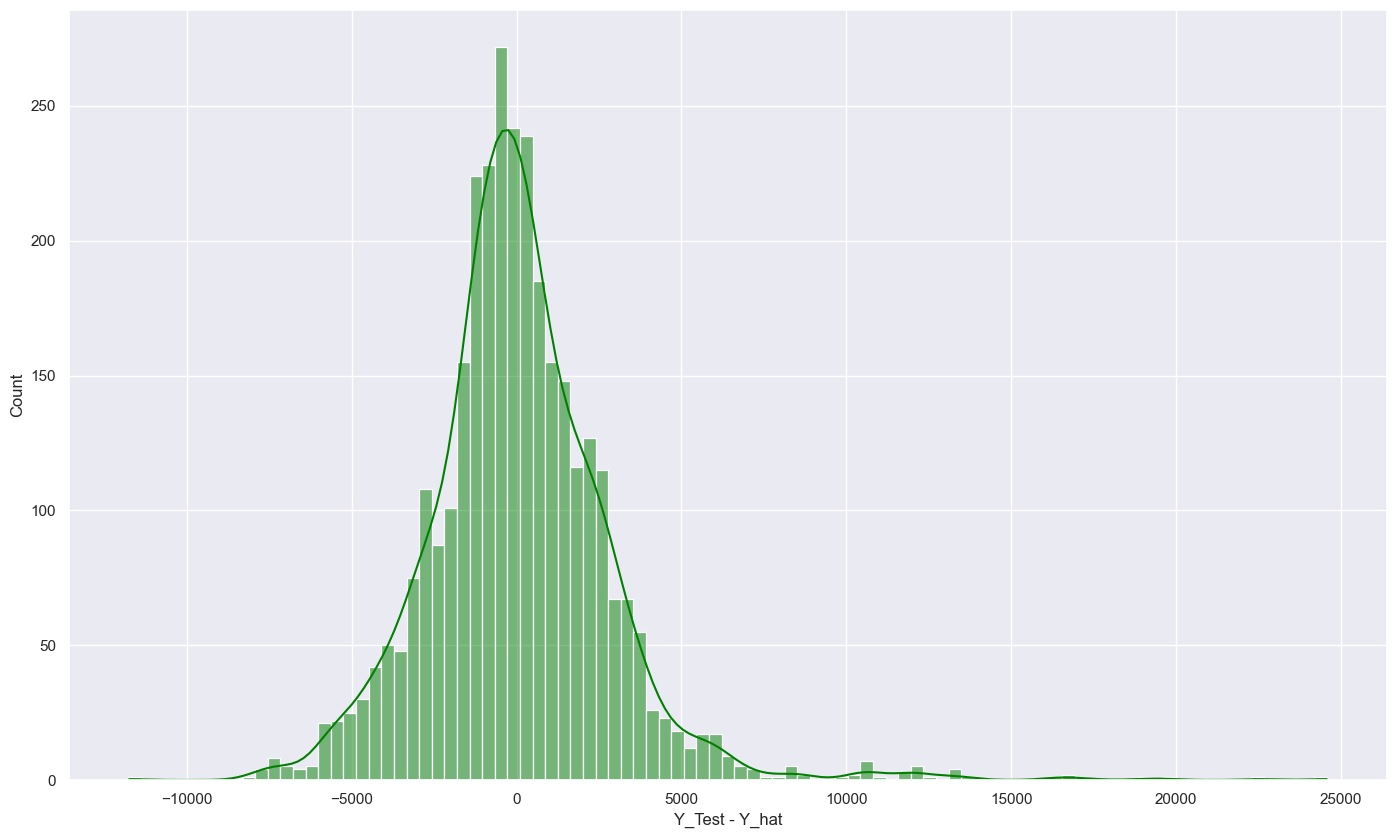

In [177]:
plt.figure(figsize = (17, 10))
sns.histplot(Y_test - Y_hat, kde = True , color = 'green')
plt.xlabel("Y_Test - Y_hat")
plt.ylabel("Count")

In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae =  mean_absolute_error(Y_test, Y_hat)
mse = mean_squared_error(Y_test, Y_hat)
r2score = r2_score(Y_test, Y_hat)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Mean Absolute Error :  1948.900647089123
Mean Squared Error :  7741987.302985683
Root Mean Squared Error :  2782.442686379305
R2 Score :  0.6490392122093431


In [184]:
#decision tree

In [185]:
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [187]:
Y_hat = dec_model.predict(X_test)
print("Predicted values for the Test Set\n", Y_hat[:100])

Predicted values for the Test Set
 [ 7870.  14221.  10844.   4423.   5298.   5277.   6945.   3419.   6094.
 12121.   9535.   4804.   3419.  13882.  14781.   9397.   4371.  11098.
  4823.   4945.   4226.   8425.   5403.   6442.   4990.   9646.   7189.
 12102.  12373.  14151.   5957.  12251.  22270.   5601.   8626.   8586.
 12488.  17024.   9663.   4544.   7530.  14960.   5298.   4201.  13885.
  3419.  11087.   4591.   9663.  14388.  14231.   4483.  11003.  12996.
  5224.   3383.   5192.   3540.  17471.   5618.  11691.  10441.  11263.5
 13033.  15129.  10493.   9315.   2050.   3857.   3100.   9443.   9663.
  4487.   5734.  14069.   3873.  12778.   2228.   3383.   6253.   6442.
 10678.  14388.   4778.  11789.   4483.   6442.   2228.  14781.   7081.
 12609.   6711.   9345.   5886.5 12649.  11542.   8452.   3597.   5515.
 15164. ]


Text(0, 0.5, 'Count')

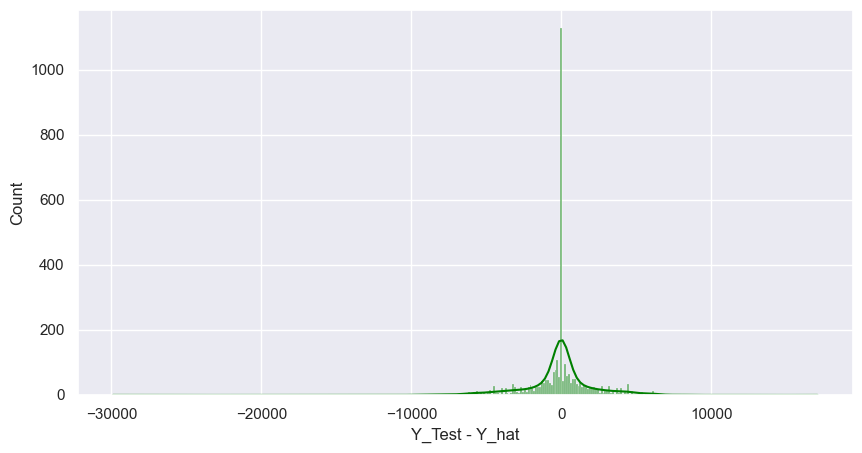

In [190]:
plt.figure(figsize = (10, 5))
sns.histplot(Y_test - Y_hat, kde = True, color = 'green')
plt.xlabel("Y_Test - Y_hat")
plt.ylabel("Count")

In [191]:
mae =  mean_absolute_error(Y_test, Y_hat)
mse = mean_squared_error(Y_test, Y_hat)
r2score = r2_score(Y_test, Y_hat)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Mean Absolute Error :  1372.1045345813832
Mean Squared Error :  6416807.882442711
Root Mean Squared Error :  2533.141899389513
R2 Score :  0.709112420185074


In [179]:
#random forest

In [180]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

Y_hat = rf_model.predict(X_test)
print("Predicted values for the Test Set\n", Y_hat[:100])

Predicted values for the Test Set
 [ 8519.3        13742.62       11512.28        4358.01
  5564.69666667  5802.15        7071.11        4270.0375
  5871.5        12149.55583333 11604.84        4800.79
  3571.55       13426.94116667 14049.333       9107.18
  4200.63866667 11251.89666667  4907.99        4947.26213564
  4270.24       10678.97        5206.82590476  8345.47
  4718.27       10060.83        6506.02       11917.
 12329.37       12650.72666667  6409.57       16699.15
 23545.75        5639.54        6897.53       10398.1775
 12600.435      16680.855      10895.23883333  4992.18833333
  8127.06666667 14872.24        5552.682       6097.6
 12763.91        3797.19133333 10826.01        4480.31
 11023.70166667 11839.9952381  12520.39116667  4654.71
 12448.37       12244.60083333  4988.99        3446.14
  6082.39        3543.92       17222.91        5520.95
 11623.9765     10535.73       11146.415      12916.5375
 14707.43       10649.825       9521.47333333  2645.93
  3910.25219048

Text(0, 0.5, 'Count')

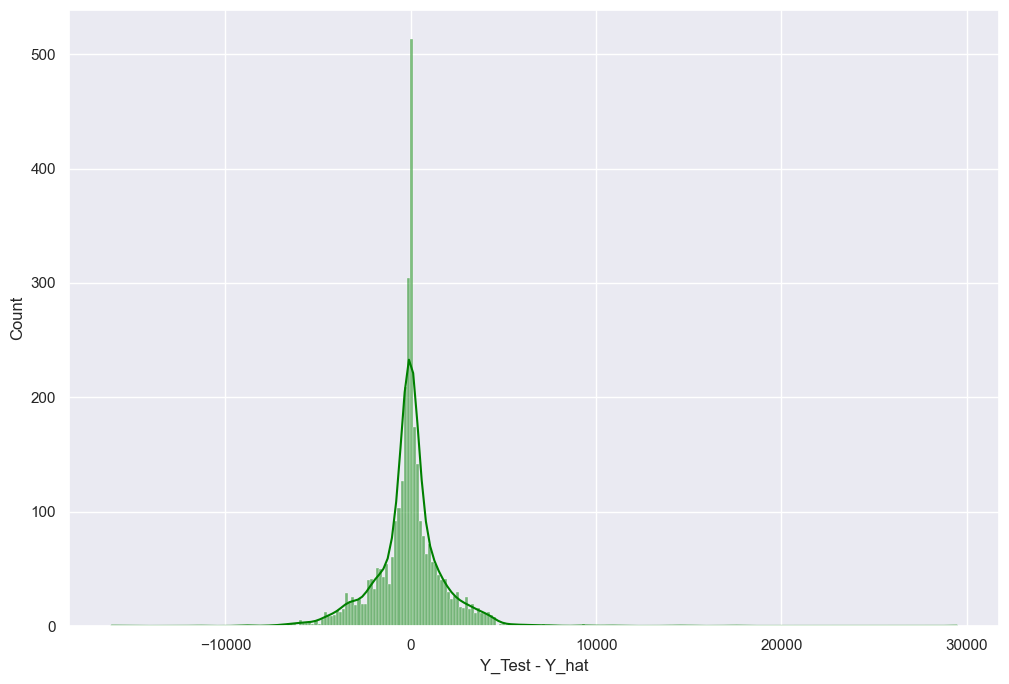

In [181]:
plt.figure(figsize = (12, 8))
sns.histplot(Y_test - Y_hat, kde = True , color = 'green')
plt.xlabel("Y_Test - Y_hat")
plt.ylabel("Count")

In [183]:
mae =  mean_absolute_error(Y_test, Y_hat)
mse = mean_squared_error(Y_test, Y_hat)
r2score = r2_score(Y_test, Y_hat)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Mean Absolute Error :  1181.0071376427006
Mean Squared Error :  3789737.7679287205
Root Mean Squared Error :  1946.7248824445433
R2 Score :  0.828203108517197


In [196]:
 from sklearn.ensemble import GradientBoostingRegressor

In [249]:
gbr_model = GradientBoostingRegressor(n_estimators=90, learning_rate=0.2, max_depth=6, random_state=42,loss='squared_error')

In [250]:
gbr_model.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, n_estimators=90,
                          random_state=42)

In [251]:
Y_hat = gbr_model.predict(X_test)
print("Predicted values for the Test Set\n", Y_hat[:100])

Predicted values for the Test Set
 [ 8249.50391642 14334.76353425 11787.18695637  4353.40570227
  5772.32393075  6432.0739703   6944.39257264  4331.50801163
  6147.86627548 12323.04325288 12316.26890186  4697.64501891
  3837.38214303 12534.17102826 13290.99093246  8311.7162445
  3803.35961005 10590.65549518  4607.11964326  4829.43093834
  4515.13107056 10896.68186592  5125.60368949  7638.15065229
  4480.86460229  9328.57592008  6177.44095988 12954.03898079
 12812.8974016  11373.82396628  6647.47232583 16473.83770704
 23969.94340874  5495.04876426  5893.23073923 11026.86660058
 11763.86933611 16144.03772092 11471.24848547  5613.77567751
  8667.63616445 14601.55157804  5895.51842814  6818.2413102
 10595.51324626  4368.98451899 13580.89178825  4435.01883907
  9845.20444673 11674.85344166 12256.48268816  4464.14210819
 11375.36280646 10677.46982975  4582.74977069  4266.99865263
  6787.02330854  3613.07373556 16469.35857871  5570.17595631
 11913.35465686 10499.48414506 10862.45043638 12469.

Text(0, 0.5, 'Count')

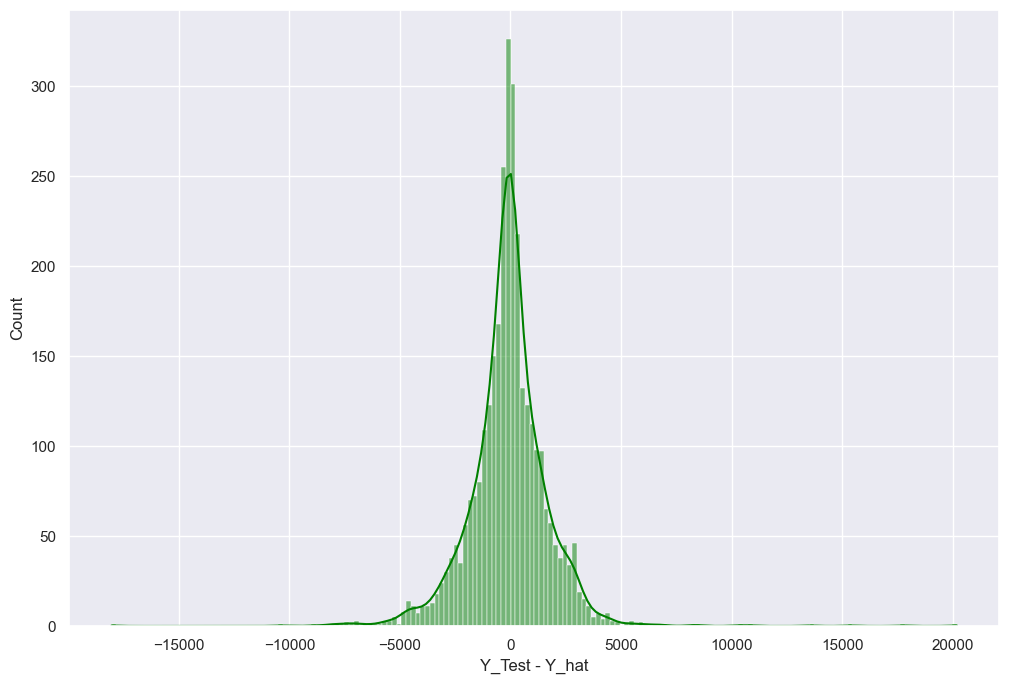

In [252]:
plt.figure(figsize = (12, 8))
sns.histplot(Y_test - Y_hat, kde = True , color = 'green')
plt.xlabel("Y_Test - Y_hat")
plt.ylabel("Count")

In [253]:
mae =  mean_absolute_error(Y_test, Y_hat)
mse = mean_squared_error(Y_test, Y_hat)
r2score = r2_score(Y_test, Y_hat)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Mean Absolute Error :  1194.077456124686
Mean Squared Error :  3297734.9995235167
Root Mean Squared Error :  1815.9666845852423
R2 Score :  0.8505066427955449


# GradientBoostingRegressor had highest accuracy againt test datasets 


In [254]:
import pickle
file = open("fare_predict.pkl", 'wb')
pickle.dump(gbr_model, file)

In [255]:
file = open("fare_predict.pkl", "rb")
mdl = pickle.load(file)